In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for wrangling and exploration
# import wrangle

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for statistical analysis
import scipy.stats as stats

import env
import os
import wrangle

#### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [13]:
query = '''
SELECT bedroomcnt, 
		bathroomcnt, 
        calculatedfinishedsquarefeet,
        taxvaluedollarcnt,
        yearbuilt,
        taxamount,
        fips
 FROM properties_2017
 WHERE propertylandusetypeid = 261
 OR propertylandusetypeid = 279
 ;
'''

In [14]:
df_2017 = pd.read_sql(query, env.conn('zillow'))

In [15]:
zil = df_2017

In [16]:
zil.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [17]:
zil.shape

(2152864, 7)

In [18]:
zil.to_csv('zillow.csv')

#### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [2]:
zil = pd.read_csv('zillow.csv').iloc[:,1:]

In [3]:
zil.head(10)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
8,0.0,0.0,NaN,6730242.0,NaN,80348.13,6037.0
9,0.0,0.0,NaN,15532.0,NaN,248.89,6037.0


In [4]:
zil.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [5]:
zil.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152853 non-null  float64
 1   bathroomcnt                   2152853 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152371 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148422 non-null  float64
 6   fips                          2152864 non-null  float64
dtypes: float64(7)
memory usage: 115.0 MB


In [6]:
# FROM REVIEW. ANOTHER WAY
def remove_outliars(df, k, cols):
    for col in cols:
        q1,q3 = df[col].quantile([.25,.75])
        iqr = q3-q1
        upper = q3 + k*iqr
        lower = q1 - k*iqr
        
        df = df[(df[col] > lower) & (df[col] < upper)]
        
    return df

In [7]:
zil = remove_outliars(zil, 1.5, ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet','taxvaluedollarcnt','taxamount'])

<AxesSubplot:xlabel='taxamount'>

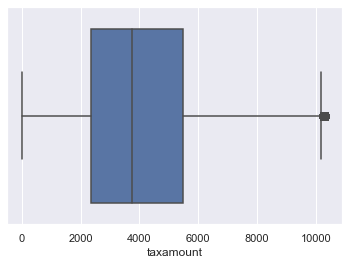

In [8]:
sns.boxplot(data=zil, x='taxamount')

In [9]:
zil.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,1855285.0,3.214593,0.781464,2.00,3.00,3.00,4.00,5.00
bathroomcnt,1855285.0,2.053629,0.707729,1.00,2.00,2.00,2.50,4.00
calculatedfinishedsquarefeet,1855285.0,1653.860449,564.642431,1.00,1231.00,1548.00,1988.00,3410.00
taxvaluedollarcnt,1855285.0,327947.824862,198968.724988,22.00,173806.00,296621.00,452500.00,950940.00
yearbuilt,1854411.0,1959.444875,20.546039,1801.00,1949.00,1957.00,1972.00,2016.00
taxamount,1855285.0,4069.332016,2242.381016,16.48,2366.34,3747.01,5487.57,10377.84
fips,1855285.0,6048.348769,20.548267,6037.00,6037.00,6037.00,6059.00,6111.00


In [10]:
zil.isnull().sum()

bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet      0
taxvaluedollarcnt                 0
yearbuilt                       874
taxamount                         0
fips                              0
dtype: int64

In [11]:
zil.yearbuilt.mode()

0    1955.0
Name: yearbuilt, dtype: float64

In [12]:
# INITIAL WRANGLE BELOW

In [4]:
zil = zil.dropna(how='any')

In [5]:
zil.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [6]:
zil.fips.value_counts(ascending=True)

6111.0     325354
6059.0    1100896
6037.0    2848344
Name: fips, dtype: int64

In [7]:
zil.bedroomcnt = zil.bedroomcnt.astype('int64')
zil.calculatedfinishedsquarefeet = zil.calculatedfinishedsquarefeet.astype('int64')
zil.taxvaluedollarcnt = zil.taxvaluedollarcnt.astype('int64')
zil.yearbuilt = zil.yearbuilt.astype('int64')
zil.fips = zil.fips.astype('int64')

In [8]:
zil.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,3.0,2090,615000,1973,8625.75,6037
1,5,3.0,2479,531642,1973,6722.67,6037
2,4,2.0,2057,328148,1973,4160.63,6037
3,4,3.0,2423,297377,1978,3883.47,6037
4,4,3.0,2226,297001,1978,3884.27,6037


#### 3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [19]:
def wrangle_zillow():
    '''
    This function checks if the zillow data is saved locally. 
    If it is not local, this function reads the zillow data from 
    the CodeUp MySQL database and return it in a DataFrame.
    '''
    
    # Acquire
    filename = 'zillow.csv'
    if os.path.isfile(filename):
        df = pd.read_csv(filename).iloc[:,1:]
    else:
        q1 = '''SELECT bedroomcnt, 
                    bathroomcnt, 
                    calculatedfinishedsquarefeet,
                    taxvaluedollarcnt,
                    yearbuilt,
                    taxamount,
                    fips
                 FROM properties_2016
                 WHERE propertylandusetypeid = 261
             ;'''
        q2 = '''SELECT bedroomcnt, 
                    bathroomcnt, 
                    calculatedfinishedsquarefeet,
                    taxvaluedollarcnt,
                    yearbuilt,
                    taxamount,
                    fips
                 FROM properties_2017
                 WHERE propertylandusetypeid = 261
             ;'''
        df1 = pd.read_sql(q1, conn('zillow'))
        df2 = pd.read_sql(q2, conn('zillow'))
        df = pd.concat([df1,df2])

        df.to_csv(filename)
        
        
    # Prepare
    df = df.dropna(how='any')
    df.bedroomcnt = df.bedroomcnt.astype('int64')
    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype('int64')
    df.taxvaluedollarcnt = df.taxvaluedollarcnt.astype('int64')
    df.yearbuilt = df.yearbuilt.astype('int64')
    df.fips = df.fips.astype('int64')
    
    df.columns = ['beds', 'baths', 'sqft', 'price', 'built', 'taxes', 'location']
    
    return df

In [20]:
test = wrangle_zillow()

In [21]:
test.head()

,beds,baths,sqft,price,built,taxes,location
0,4,3.0,2090,615000,1973,8625.75,6037
1,5,3.0,2479,531642,1973,6722.67,6037
2,4,2.0,2057,328148,1973,4160.63,6037
3,4,3.0,2423,297377,1978,3883.47,6037
4,4,3.0,2226,297001,1978,3884.27,6037


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4274594 entries, 0 to 4301224
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   beds      int64  
 1   baths     float64
 2   sqft      int64  
 3   price     int64  
 4   built     int64  
 5   taxes     float64
 6   location  int64  
dtypes: float64(2), int64(5)
memory usage: 260.9 MB


In [2]:
# Test it out
import wrangle

In [3]:
df = wrangle.wrangle_zillow()

In [4]:
df.isnull().sum()

beds        0
baths       0
sqft        0
price       0
built       0
taxes       0
location    0
dtype: int64

In [5]:
df.head()

,beds,baths,sqft,price,built,taxes,location
0,4,3.0,2090,615000,1973,8625.75,6037
1,5,3.0,2479,531642,1973,6722.67,6037
2,4,2.0,2057,328148,1973,4160.63,6037
3,4,3.0,2423,297377,1978,3883.47,6037
4,4,3.0,2226,297001,1978,3884.27,6037


In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4274594 entries, 0 to 4301224
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   beds      4274594 non-null  int64  
 1   baths     4274594 non-null  float64
 2   sqft      4274594 non-null  int64  
 3   price     4274594 non-null  int64  
 4   built     4274594 non-null  int64  
 5   taxes     4274594 non-null  float64
 6   location  4274594 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 260.9 MB


In [2]:
# TEST WRANGLE

In [3]:
df = wrangle.wrangle_zillow()

In [4]:
df.head()

,beds,baths,sqft,tax_value,built,taxes,location
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [5]:
train, val, test = wrangle.split_data(df)

In [6]:
train,val,test = wrangle.impute_mode(train,val,test,'built')

In [9]:
train.isnull().sum()

beds         0
baths        0
sqft         0
tax_value    0
built        0
taxes        0
location     0
dtype: int64